# DSCI 100 Section 005 Group 7 Project Proposal

## Introduction

Basketball is a sport played throughout the world. In the professional scene, the most highly skilled basketball players play in the National Basketball Association League (NBA) in North America. The most skiled and popular players in the NBA are given the title "All-Star", as voted by fans. Being an All-Star signifies that a player is elite in the most difficult, demanding professional basketball league in the world.
As such, the goal for our project is to answer the following question: Can we predict whether a player will be an all-star based on their points scored per game and total minutes played per game in the regular season?
To answer this question, we will be using two data sets from kaggle. One data set has all the stats of all-star players from 2010 - 2022 during the regular season. The other data set will have all the stats of all players from 2010 - 2022 during the regular season.

## Method 


### Datasets

A combination of both general NBA players and NBA ALL-STARS datasets/tables will be used to retrieve individual player stats. But the variables for both shall remain the same. Once both these datasets are mutated, filtered, and selected for suitability of the project, the training and testing sets will be sliced into separated tables. The training set will be used to establish the training model upon and the testing set will be used to evaluate the accuracy and precision of the trained model. 

### Variables

The classification of whether an NBA player will get drafted as an ALL-STAR player has several criterias to be assessed upon. For this project, the variables of ***total minutes played*** and ***average points per game*** will be used to evaluate this classification. The variable of ***total minutes played*** is derived by mutating the *min* (average minutes) and *games_played* (total games played) column. The variable ***average points per game*** is derived from the *pts* (average points per game) column.

### Visualization:

The variables of ***average points per game*** vs ***total minutes played*** will be visualized in scatter plot graph as it is expected that the data points for "NBA players" and "NBA ALL-STARS players" will be random. Both types of data points will be made distinctive using color and shape-based distinctions in order to visually evaluate any trends for both categories in terms of "average points per game" and "total minutes played".



In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 1003 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): first, last, team
dbl  (20): year, games_played, fgm, fga, fg3m, fg3a, ftm, fta, oreb, dreb, r...
time  (1): min

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,⋯,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
<chr>,<chr>,<chr>,<dbl>,<dbl>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Julius,Erving,PHI,1980,82,35:02:00,9.68,18.59,0.05,0.22,⋯,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
Eddie,Johnson,ATL,1980,75,35:55:00,7.64,15.16,0.08,0.32,⋯,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
Artis,Gilmore,CHI,1980,81,34:31:00,6.67,9.93,0.00,0.00,⋯,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
Reggie,Theus,CHI,1980,81,34:20:00,6.58,13.38,0.22,1.09,⋯,3.56,5.41,1.73,0.28,3.65,3.14,18.84,0.492,0.203,0.808
Larry,Bird,BOS,1980,82,39:30:00,8.77,18.33,0.24,0.92,⋯,10.91,5.50,2.61,0.84,3.69,2.91,21.23,0.478,0.266,0.863
Robert,Parish,BOS,1980,82,28:01:00,7.74,14.22,0.00,0.01,⋯,9.48,1.77,1.10,3.00,2.41,3.78,18.93,0.545,0.000,0.710
Nate,Archibald,BOS,1980,80,35:15:00,4.78,9.58,0.00,0.09,⋯,2.20,7.73,1.24,0.22,3.61,2.50,13.83,0.499,0.000,0.816
Micheal,Ray Richardson,NYK,1980,78,40:06:00,6.59,14.13,0.29,1.39,⋯,6.90,7.99,3.66,0.42,3.67,3.27,16.31,0.466,0.212,0.666
Marques,Johnson,MIL,1980,76,33:26:00,8.37,15.17,0.00,0.13,⋯,6.79,4.54,1.50,0.55,2.59,2.58,20.28,0.552,0.000,0.702


name,pts,total_min_played
<chr>,<dbl>,<drtn>
Kevin Durant,27.71,10932480 secs
Kobe Bryant,25.34,10002360 secs
Chris Paul,15.85,10368000 secs
Carmelo Anthony,25.58,9900660 secs
Tim Duncan,13.45,7756560 secs
Pau Gasol,18.79,10937160 secs
Manu Ginobili,17.41,8726400 secs
Deron Williams,20.14,8872500 secs
Blake Griffin,22.50,11202840 secs


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


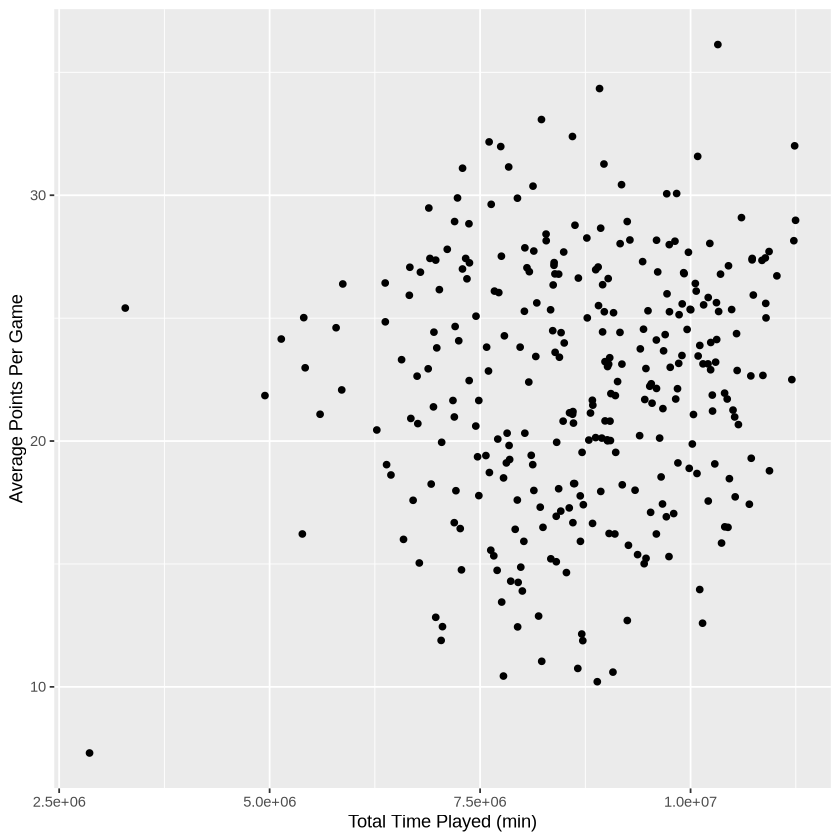

In [33]:
all_star_data <- read_csv("final_data.csv")

all_star_data

all_star_data_refined <- mutate(all_star_data, total_min_played = games_played * min, name = paste(first, last)) |>
    filter(year > 2009) |>
    select(name, pts, total_min_played)

all_star_data_refined


all_star_plot <- all_star_data_refined |>
    ggplot(aes(x = total_min_played, y = pts)) +
    geom_point() +
    labs(x = "Total Time Played (min)", y = "Average Points Per Game")

all_star_plot